<center>
<H1> Bien gérer sa transition de Matlab à Python </H1>
<img src="death2malab.png" width=400>
</center>
                              
- jupyter notebook et sources disponibles sur https://gitlab.inria.fr/fuentes/death2matlab


# Problèmatique

 - *Matlab* est de facto la _lingua franca_ du calcul scientifique
 - Utilisation simple et rapide pour du prototypage
 - problèmes : 
  - code proprietaire et fermé  $\rightarrow$ : mauvais pour la *réproductibilité scientifique* 
  - licence payante : contexte pédagogique difficile
  - diffusion des code restreint par la licence et l'environnement *matlab*
  - modèle objet assez pauvre
  

# Plan de l'exposé

- Python : apercu générale et découverte
- les interprètes Python
- les Environnements de Développement Intégré (IDE) 
- méthodologie : tests, documentation, verification,
- Numpy et Scipy, Sympy
- Matplotlib 
- travaux pratiques (optionnel)
- performance et déverminage
- interfaces (C et fortran)
- calcul parallèle 

# le langage Python
 - Crée en 1991 par Guido van Rossum
 - avantages
  - apprentissage plutot rapide, bonnes capacités pédagogiques
  - différents paradigmes : imperatif, fonctionnel et objet
  - grosse communauté : spectre d'utilisation large, nombreux paquets, bibliothèque standard fournie
  - disponibilité multi-platformes : linux(amd64, arm), windows (python xy) et macos
 - inconvenients :
  - structure des programmes définie par des indentations 
  - la plupart des «implémentations» sont des interpréteurs
  - Cpython comporte un verrou global → gêne pour le parallélisme à mémoire partagée
  
 

# Exemples


In [27]:
# aspects imperatifs
def reverse_bourrin(l):
    r = [] 
    n = len(l)
    for i in range(n-1,-1,-1):
        r.append(l[i])
    return r     
reverse_bourrin([1,2,3])        

[3, 2, 1]

In [28]:
def reverse_lazy(l):
    return l[::-1]
reverse_lazy([1,2,3])

[3, 2, 1]

In [29]:
# recursif
def reverse_rec(x):
    return [x[-1], *(tuple(reverse_rec(x[:-1])))] if len(x) > 0 else []
reverse_rec([1,2,3])

[3, 2, 1]

In [30]:
# aspects fonctionnels du langage (map + lambda)
sum(map(lambda x:x*x,[1,2,3]))

In [31]:
# liste definie en compréhension
[ x for x in range(11) if x%2 == 0]

[0, 2, 4, 6, 8, 10]

In [32]:
# la même définie avec un filter et lambda
list(filter ( (lambda x:x%2 == 0), range(11)))

[0, 2, 4, 6, 8, 10]

In [33]:
# aspect objet : typage dynamique (duck typing)
class fonction: 
    def eval(self, x):
        raise NotImplementedError()
    def integre_sur_0_1(self,n):
        return 1./n * sum(map(lambda x:self.eval(x*1./n),range(n+1)))
                          
class affine(fonction):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def eval(self,x):
        return self.a*x+self.b

class trinome(fonction):
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
    def eval(self,x):
        return self.a*x*x+self.b*x+self.c
                          
    
f1 = trinome(1,0,0)
f2 = affine(8,9)

for obj in [f1,f2]:
    print(obj.integre_sur_0_1(1000))
#f3 = fonction()
#f3.eval(3.)

TypeError: unsupported operand type(s) for *: 'float' and 'map'

# Types

In [ ]:
# liste
l = [1,2,3]; print(l)
print(list(range(1,10,2)))
print(l.__class__)

In [ ]:
# dictionnaires : on peut regrouper n'importe quoi ensemble à l'aide d'un couple clef, valeur
a = {1:2, "hehe": (lambda x:x*x), 3:"haha"}
print(a.keys())
print(a["hehe"](4))

In [ ]:
# nuplet immuable ()
t = ("haha",1); print(f" class → {t.__class__}, premier element {t[0]}", ", tuple «explosé»,", *t)
def f1(x,y):
    return x*x - y*y
def f2(x):
    return x[0]*x[0] -y[1]*y[1]
f1(*[1,2])

In [ ]:
# chaîne de caractères
a = "ab"+"c"
print(a[0],a[-1])
print("c" in a)
print(a.find("c"))


# Structures de contrôle 
## branchement
```python
if x > 0:
    print 'positif'
elif x == 0:
    print 'zero'
else:
    print 'negatif'
    ```

## iterations

```python
for i in range(10): # sur des entiers
     print i
for z in ["coucou", "hoho"]: # sur une liste
    print z
i  = 1 
while i < 10: # boucle tant que
      i *= 2 
print i      
``` 

## fonctions
Pour déclarer une fonction on utilise les mot-clefs `def` et `return`. <br> 
Par exemple, pour déclarer la fonction $f : (x,y) \mapsto (x+y,x*y)$
```python
def f(x,y):
    return x+y, x*y
a,b = f(2,3) # a et b sont des entiers 
z = f(2,3) # z est un couple
```
si le corps de la fonction est très simple on peut utiliser une fonction anonyme ({\tt lambda})
```python
g = (lambda x,y: (x+y, x*y))
z = g(2,3)
```

In [ ]:
# operateurs non classique
print( 2 in [1,2,3]) # operateur d'appartenance à une séquence
l = [1,2]; l2 = l; print( l is l2 ) # True, reference sur le meme objet
l3 = l.copy() ; print (l is l3) # False, ce n'est plus le même objet


# Implémentations

- Cpython : standard (en C), un seul inconvenient le GIL
- Pypy : compilateur a la volée → plus rapide, mais les bibliothèques ne sont pas toutes supporteés
- Jython : implementation en java
- Stackless python : un version avec coroutines et micro fils d'executions
- IronPython : implementation en .NET
- micropython : implementation sur certains microcontroleurs

# Environments de développement
 - interpreteur python : spartiate, mais supporte l'historique, la completion et la documentation, 
 peut être utilisé avec un editeur texte (vim, emacs) dans un multiplexeur de terminal
 - jupyter 
  - console : comme precedemment mais enrichie, couleur, commandes magiques (comme ipython)
  - qt-console : permet de faire les graphiques dans la console
  - notebook : je l'utilise en ce moment
 - emacs org-mode (aussi tres utilisé comme jupyter pour les cahiers d'experience)
 - spyder : c'est ce qui ressemble le plus à Matlab
 - pycharm : ide complet, mais gourmand en ressource (basé sur java)

# Bonnes pratiques :  Tests
 - pourquoi des tests : non-regression (pour gestion de version et integration continue )
 - suite de tests automatiques
 - tests unitaires
 - tests d'integration
 - modules de tests : 
   - doctests : trés simple à mettre en œuvre
   - pytest : cadriciel plus riche
 - developpement guidé par les tests (TDD) : https://fr.wikipedia.org/wiki/Test_driven_development  

In [45]:
import doctest
from math import sqrt

def carre(x):
    """ 
    >>> carre(2)
    4
    >>> carre(3)
    9
    >>> abs(carre(sqrt(2))-2) < 1e-12
    True
    """
    return (x*x)
doctest.testmod()

TestResults(failed=0, attempted=3)

In [46]:
f=open("test_ex.py","w")
a="""
carre_false = (lambda x: x+2)
carre_true =  (lambda x: x*x)
def test_1():
      assert carre_false(1) == 1
def test_2():
       assert carre_true(2) == 4
""";
print(a,file=f)
f.close()
! pytest

============================================================== test session starts ===============================================================
platform linux -- Python 3.8.2, pytest-5.3.5, py-1.8.1, pluggy-0.13.1
rootdir: /home/fux/sources/death2matlab
collected 2 items                                                                                                                                

test_ex.py F.                                                                                                                              [100%]

==================================================================== FAILURES ====================================================================
_____________________________________________________________________ test_1 _____________________________________________________________________

    def test_1():
>         assert carre_false(1) == 1
E         assert 3 == 1
E          +  where 3 = carre_false(1)

test_ex.py:5: AssertionError
======

# Bonne pratiques : documentation
 - pas seulement pour les autres : aussi pour vous
 - docstring : systeme léger → integration aux interprètes
 - sphinx : permet de générer des pages html
    

In [ ]:
def my_square(x):
    """
     my_square(x)
     
     computes the square of the float x 
    """
    return x*x 
    

In [ ]:
?my_square

# verification : analyse du code
 - analyse statique :
  -  **pylint** : donne une note a votre code pour s'assurer qu'il respecte les standards PEP, 
    il a un sous-outil **pyreverse** qui construit des diagrammes de classe (UML) 
  - pyflakes : pas de conseil sur le style  
  - flake8 : combine les deux precedents
 - outils integrés la plupart du temps (spyder , greffon syntastic dans vim)
 

# Enfin des matrices! Numpy et Scipy
- Numpy et Scipy : le pourquoi de l'aternative à matlab
- Numpy : biblothèque optimisée de tableaux multi-dimensionels + algèbre linéaire
- scipy : collection de routine et de fonctions pour le calcul numérique
  - integration
  - optimisation de fonction
  - interpolation
  - fonctions speciales
  - statistiques

In [1]:
from numpy import *
a = arange(27)
a = a.reshape(3,3,3)
sum(a,axis=2)


array([[ 3, 12, 21],
       [30, 39, 48],
       [57, 66, 75]])

# bréviaire de survie pour le matlabeux

| nom                        | usage                                    |
|----------------------------|------------------------------------------|
| `zeros((m,n,...))`         | alloue une matrice avec des 0            |
| `ones(((m,n,...))`         | alloue une matrice avec des 1            |
| `arange(deb,fin,pas)`      | crée un vecteur de `deb` à `fin-1`       |
| `linspace(a,b,n)`          | crée un vecteur de `n` valeurs `a` à `b` |
| `eye(n)`                   | renvoies la matrice unité d'ordre  ` n`  |
| `diag(v)`                  | crée une matrice avec `v` pour diagonale |
| `diag(m)`                  | extrait la diagonale de `m`              |
| `a.shape`, ` shape(a)`     | renvoies les dims de a                   |
| `a.T` ,` transpose(a)`     | transposée de a                          |
| `a.flatten()`              | aplatit une matrice en vecteur           |
| `vstack((a,b))`, `r_[a,b]` | concatène verticalement `a` et `b`       |
| `hstack((a,b))`, `c_[a,b]` | concatène horizontalement `a` et `b`     |
| `dot(a,b)` ou `a @ b` (3)  | produit matriciel classique              |
| `a * b `                   | produit d'hadamard (terme à terme )      |

## quelques remarques

- les indices des *tranches* commencent toujours à zéro et ne contiennent pas le dernier élément : 

In [2]:
a=zeros((4,3))
all(a[0:4,1]==a[:,1]) 

True

- le dernier élément d'une dimension peut être atteint au travers de l'indice -1
- les tableaux a une dimension existent en **Python** 

In [3]:
a=zeros((4,3)); print(f" a[:,1] → {a[:,1].shape} mais a[:,1:2] → {a[:,1:2].shape}")

 a[:,1] → (4,) mais a[:,1:2] → (4, 1)


- Attention **Python** utilise des références : 

In [4]:
a = zeros(4); b=a; b[1] = 10; a[1] # pas zero!

10.0

- Pour copier un objet, on utilise `.copy()` : ainsi

In [5]:
a = zeros(4); b=a.copy(); b[1] = 10; a[1] # ok, ici on copie

0.0

### Réplication (broadcast) : qu'es aquò ?
**Python** permet la *réplication* de matrices de dimensions différentes lors d'opérations  terme à terme  <br>
(on dit aussi  *au sens d'Hadamard*) : en clair, <br>
si 2 matrices (ou tableaux N-D) ont une (ou plusieurs) dimensions différentes et que ces dimensions sont <br>
égales à 1 dans un des deux membres de l'opération alors cette matrice est dupliquée selon cette dimension pour <br>
la faire correspondre avec l'autre.<br>

In [42]:
import numpy.random
from numpy.linalg import norm
a = random.rand(10,3) # a est de dimension 10x3
m = mean(a,0) # m est de dimension 3
a_0 = a - m # OK, on peut verifier que linalg.norm(np.mean(a_0,0)) ~ 0
print(norm(mean(a_0,0)))

1.5700924586837754e-17


In [43]:
m = r_[m,1] # m est maintenant de taille 4
a_0 = a - m # operands could not be broadcast together with shapes (10,3) (4)!

ValueError: operands could not be broadcast together with shapes (10,3) (4,) 

### Application : 
construction d'une matrice à partir d'un operateur binaire (comme le «bon vieux» `bsxfun` de matlab) <br>
pour construite $M_{ij} = x_i+y_j$, a partir des vecteurs $x$ et $y$

In [40]:
x = arange(3)
y = x 
M = x[None,:] + y[:,None]; print(M)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


 `None` ou `np.axis` permet de transformer des vecteurs 1D, en matrices en ajoutant une dimension égale à 1.
 

# Exemples
## matrice de Vandermonde
 - définition avec une liste en comprehension

In [39]:
def vander_comp(x):
    """
    builds the matrix V(x)_{ij}=x_j^{i-1}
    """
    n = x.shape[0]
    return reshape(array([x[j]**i for i in range(n)
                          for j in range(n)]), (n, n))

- definition avec replication
→ en exercice 

## exemples : scipy
  - interpolation

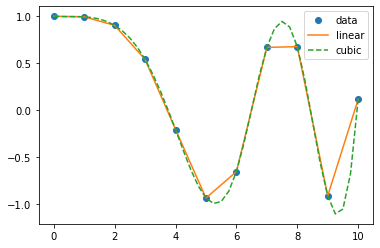

In [86]:
from numpy import *
from scipy.interpolate import interp1d

x = linspace(0, 10, num=11, endpoint=True)
y = cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

### optimisation

In [37]:
from scipy.optimize import minimize
def f(x):
    return 100.0*(x[0]-x[1]**2.0)**2.0 + (1-x[1])**2.0
def g(x):
     return array([200.*(x[0]-x[1]**2.), -2.*(1-x[1])-400.*(x[0]-x[1]*x[1])*x[1]])
sol = minimize(f, array([0.3,0.5]), method='BFGS', jac=g,options={'disp': True}) 
sol.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22


array([0.9999995 , 0.99999975])

## fonctions speciales
on peut tracer par exemple la fonction de bessel $j_n$ solution de l'equation
$ x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - \alpha^2)y = 0$

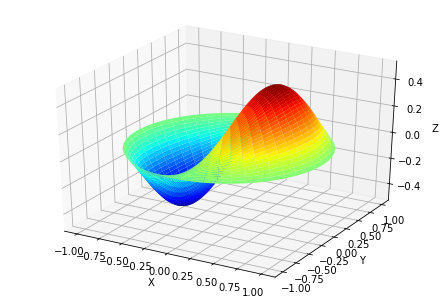

In [36]:
from numpy import r_, pi
from scipy import special
def tambour(n, k, distance, angle, t):
   kz = special.jn_zeros(n, k)[-1]
   return cos(t) * cos(n*angle) * special.jn(n, distance*kz)
theta = r_[0:2*pi:50j]
radius = r_[0:1:50j]
x = array([r * cos(theta) for r in radius])
y = array([r * sin(theta) for r in radius])
z = array([tambour(1, 1, r, theta, 0.5) for r in radius])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## scipy.linalg vs numpy.linalg
 - scipy.linalg offre plus de fonctions (par exemple expm ) et est sensé toujours utilisé une bibliothèque rapide,
 mais selon votre distribution cela peut changer

In [ ]:
%%time
from numpy import array, reshape
from scipy.linalg import solve as solve_sp
from scipy.linalg import norm as norm_sp

from numpy.linalg import solve as solve_np
from numpy.linalg import norm as norm_np
from numpy.random import rand

a = rand(2000,2000)
def test_fs(n, x):
    s = 0
    p = x.shape[0]
    for i in range(n):
        b = rand(p)
        z = solve_sp(x, b)
        s += norm_sp(z)
    return s

def test_fn(n, x):
    s = 0
    p = x.shape[0]
    for i in range(n):
        b = rand(p)
        z = solve_np(x, b)
        s += norm_np(z)
    return s

In [47]:
%timeit test_fs(10,a)

1.31 s ± 98.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
CPU times: user 1min 8s, sys: 1.45 s, total: 1min 9s
Wall time: 10.8 s


In [48]:
%timeit test_fn(10,a)

957 ms ± 78.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Matplotlib
 - assez facile pour faire du 2D 
 - possibilités limités en 3D (preferer mayavi ou paraview)
 - on peut realiser des animations en sauvegardant des images puis en faisant un appel a ffmpeg

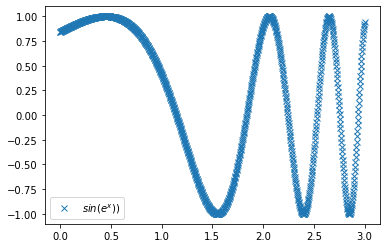

In [93]:
# graph 2D la sinusoïde
from numpy import sin
x=linspace(0,3,1000)
plt.plot(x, sin(exp(x)), 'x')
plt.legend(['$sin(e^x))$'] , loc='best')
plt.show()

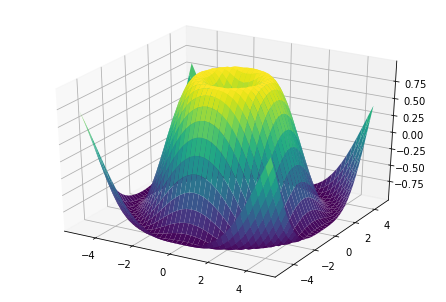

In [94]:
# un exemple en 3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

# Sympy : calcul symbolique

 - si on a des besoins simples en calcul symbolique **Sympy** fait parfaitement l'affaire, par contre
 pour des problèmes plus retors, cf sage https://www.sagemath.org/
 
 on peut deriver

In [73]:
from sympy import *
x, y, z= symbols('x y z') 
print(diff(sin(x+1)**3,x))

3*sin(x + 1)**2*cos(x + 1)


 ou integrer, par exemple  $ M_{ij} = \int_0^1 \int_0^1 x^i y^j dx  dy $ 

In [72]:
from numpy import reshape, array
reshape(array([ integrate(integrate(x**i*y**j,(x,0,1)),(y,0,1)) for i in range(4) for j in range(4)]),(4,4))

array([[1, 1/2, 1/3, 1/4],
       [1/2, 1/4, 1/6, 1/8],
       [1/3, 1/6, 1/9, 1/12],
       [1/4, 1/8, 1/12, 1/16]], dtype=object)

# TP Equation de la chaleur (optionnel)

<a href="tp_chaleur.ipynb"> notebook chaleur</a>

# Profilage

- à la louche : utiliser la macro %timeit pour comparer 2 codes
- ou un profileur on peut utiliser cProfile : 
   - cProfile
   - pyprofcall2tree
   - kCachegrind
```sh
python -m cProfile -o fic.pyprof codes/test_profile.py
pyprof2calltree -i fic.pyprof -k
```
  

# Déverminage

-  méthode du pauvre : ajouter des print
- méthode en ligne de commande avec le module pdb ou ipdb (selon votre gout)
```sh
python -m pdb mon_script.py
```

| command                 | effet                                     |
|-------------------------|-------------------------------------------|
| b(break) ligne, cond    | poser un point d'arrêt                    |
| n(next)                 | passer a la ligne suivante                |
| c(cont)                 | continuer jusqu'au prochain point d'arret |
| run                     | lancer le programme                       |
| p(print)                | afficher une variable                     |
| l(list)                 | affiche le source                         |

- utiliser le menu Debug dans spyder : interface graphique

# Interfaces et extensions

https://gitlab.inria.fr/fuentes/mdb_inter

# Calcul parallèle

 - Parallelisme à mémoire partagé :
   - problème du GIL 
   - on peut utiliser cython et du prange  
   
 - Parallèlisme à mémoire distribué
  - multiprocessing 
  - MPI4py 


In [10]:
# MPI4py reduction
f1 = open("reduc.py", "w")
reduc_source= """
from mpi4py import MPI
import operator
from functools import reduce
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()
deb = 10 * rank
fin = deb + 10
my_cnt = 0
print('Process %d will add the numbers between %d and %d' % (rank, deb, fin - 1))
my_cnt = reduce(operator.add,range(deb,fin))
cnt=comm.reduce(my_cnt)
if (rank == 0):
    print('Global count is %d' % cnt)

"""
print(reduc_source, file=f1)
f1.close()
! mpirun -np 4 python reduc.py
! rm reduc.py

Process 2 will add the numbers between 20 and 29
Process 3 will add the numbers between 30 and 39
Process 0 will add the numbers between 0 and 9
Process 1 will add the numbers between 10 and 19
Global count is 780
